<a href="https://colab.research.google.com/github/Vaishnavi-Hegde17/Deep_Learning-and-Gen_AI-Lab/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3271 - loss: 1.8209 - val_accuracy: 0.5132 - val_loss: 1.3286
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5312 - loss: 1.2992 - val_accuracy: 0.5888 - val_loss: 1.1813
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6157 - loss: 1.0898 - val_accuracy: 0.6624 - val_loss: 0.9772
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6555 - loss: 0.9744 - val_accuracy: 0.6832 - val_loss: 0.9188
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6907 - loss: 0.8799 - val_accuracy: 0.6952 - val_loss: 0.8804
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6870 - loss: 0.9045
Test loss: 0.9131044745445251
Test accuracy: 0.6820999979972839
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class: 3
True class: 3


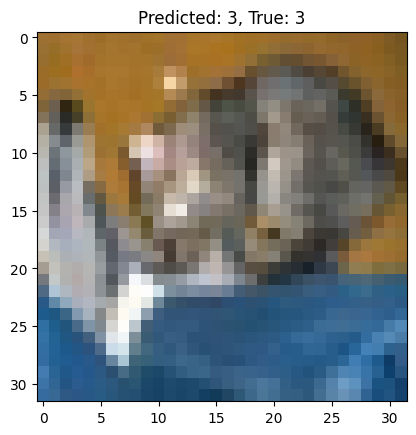

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize input data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and display the first test image
predictions = model.predict(test_X)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("True class:", test_Y[0][0])

plt.imshow(test_X[0])
plt.title(f"Predicted: {predicted_class}, True: {test_Y[0][0]}")
plt.show()


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.3121 - loss: 2.2584 - val_accuracy: 0.4656 - val_loss: 1.6152
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4881 - loss: 1.5363 - val_accuracy: 0.5228 - val_loss: 1.4329
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5391 - loss: 1.3979 - val_accuracy: 0.5680 - val_loss: 1.3117
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5715 - loss: 1.2986 - val_accuracy: 0.5632 - val_loss: 1.3502
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6057 - loss: 1.2156 - val_accuracy: 0.6260 - val_loss: 1.1707
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6257 - loss: 1.1794
Test loss: 1.1906200647354126
Test accuracy: 0.6198999881744385
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted class: 3
True class: 3


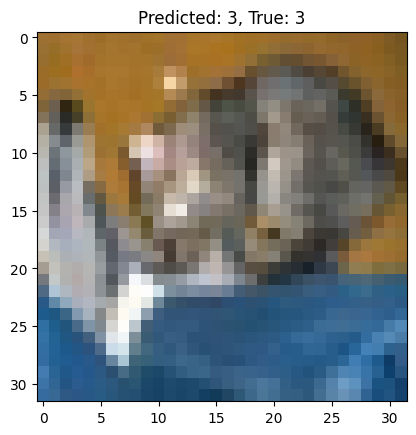

In [ ]:
# L1 Regularizer
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.regularizers import l1
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize input data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build the model
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and display the first test image
predictions = model.predict(test_X)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("True class:", test_Y[0][0])

plt.imshow(test_X[0])
plt.title(f"Predicted: {predicted_class}, True: {test_Y[0][0]}")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3410 - loss: 1.8404 - val_accuracy: 0.5150 - val_loss: 1.3863
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5468 - loss: 1.3159 - val_accuracy: 0.5948 - val_loss: 1.1922
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6134 - loss: 1.1475 - val_accuracy: 0.6342 - val_loss: 1.1012
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6471 - loss: 1.0469 - val_accuracy: 0.6572 - val_loss: 1.0409
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6745 - loss: 0.9724 - val_accuracy: 0.6394 - val_loss: 1.0847
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6254 - loss: 1.1065
Test loss: 1.1155104637145996
Test accuracy: 0.6243000030517578
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted class: 3
True class: 3


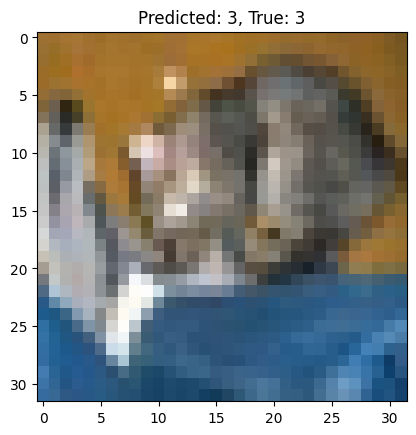

In [ ]:
# L1 Regularizer
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize input data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build the model
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and display the first test image
predictions = model.predict(test_X)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("True class:", test_Y[0][0])

plt.imshow(test_X[0])
plt.title(f"Predicted: {predicted_class}, True: {test_Y[0][0]}")
plt.show()


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2756 - loss: 1.9252 - val_accuracy: 0.4590 - val_loss: 1.4814
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4942 - loss: 1.3870 - val_accuracy: 0.5634 - val_loss: 1.2144
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5741 - loss: 1.1934 - val_accuracy: 0.6044 - val_loss: 1.1116
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6166 - loss: 1.0791 - val_accuracy: 0.6512 - val_loss: 0.9996
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6481 - loss: 0.9918 - val_accuracy: 0.6448 - val_loss: 1.0018
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6445 - loss: 1.0325
Test loss: 1.0415523052215576
Test accuracy: 0.6377999782562256
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted class: 3
True class: 3


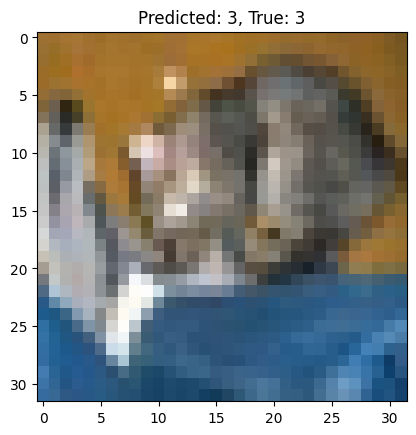

In [ ]:
# L2 Regularizer
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize input data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build the model
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(28, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Predict and display the first test image
predictions = model.predict(test_X)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("True class:", test_Y[0][0])

plt.imshow(test_X[0])
plt.title(f"Predicted: {predicted_class}, True: {test_Y[0][0]}")
plt.show()


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2542 - loss: 2.0099 - val_accuracy: 0.4472 - val_loss: 1.5246
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4787 - loss: 1.4578 - val_accuracy: 0.5362 - val_loss: 1.2955
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5399 - loss: 1.3050 - val_accuracy: 0.5664 - val_loss: 1.2356
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5741 - loss: 1.2191 - val_accuracy: 0.5942 - val_loss: 1.1598
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6087 - loss: 1.1260 - val_accuracy: 0.6376 - val_loss: 1.0588
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6246 - loss: 1.0862
Test loss: 1.0978176593780518
Test accuracy: 0.6209999918937683
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted class: 3
True class: 3


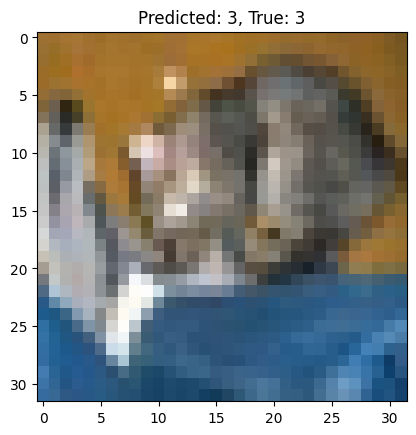

In [ ]:
# L2 Regularizer
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize input data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build the model
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(28, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Predict and display the first test image
predictions = model.predict(test_X)
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("True class:", test_Y[0][0])

plt.imshow(test_X[0])
plt.title(f"Predicted: {predicted_class}, True: {test_Y[0][0]}")
plt.show()